In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/latihan python/Untitled folder/Reactions.csv')

In [3]:
# Quick overview
print("Reactions Dataset Overview:\n", df.head())

Reactions Dataset Overview:
    Unnamed: 0                            Content ID Reaction Type  \
0           1  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1           2  97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
2           3  97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
3           4  97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
4           5  97522e57-d9ab-4bd6-97bf-c24d952602d2    interested   

          Datetime Content Type  Category Centiment  Score  
0   11/7/2020 9:43        photo  Studying  negative      0  
1  6/17/2021 12:22        photo  Studying  negative     10  
2   4/18/2021 5:13        photo  Studying  negative     15  
3   1/6/2021 19:13        photo  Studying  negative      0  
4  8/23/2020 12:25        photo  Studying  positive     30  


In [4]:
# Check for missing values
print("Missing values in Reactions:\n", df.isnull().sum())

Missing values in Reactions:
 Unnamed: 0       0
Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Centiment        0
Score            0
dtype: int64


In [5]:
# Data Cleaning: Rename 'Centiment' to 'Sentiment' if exists
if 'Centiment' in df.columns:
    df.rename(columns={'Centiment': 'Sentiment'}, inplace=True)

In [6]:
# Convert Datetime to proper format
df['Datetime'] = pd.to_datetime(df['Datetime'])

<ipython-input-7-b716228a8c5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Reaction Type'], order=df['Reaction Type'].value_counts().index, palette='coolwarm')


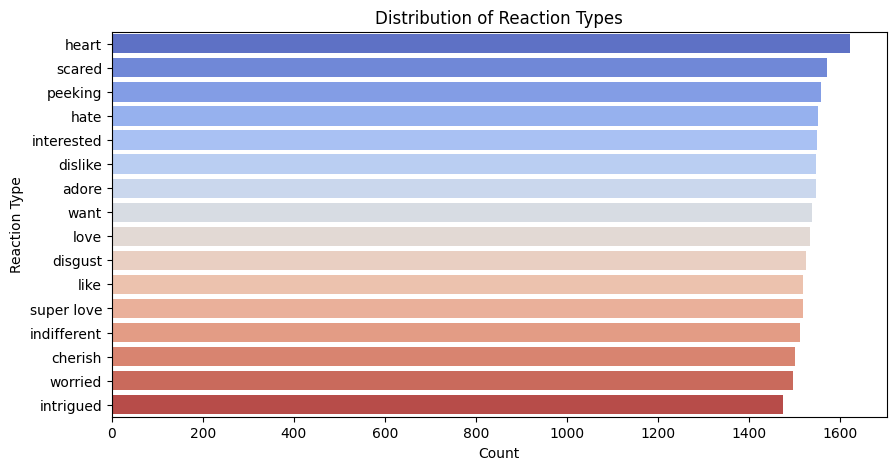

In [7]:
# Grafik 1: Distribusi Jenis Reaksi
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Reaction Type'], order=df['Reaction Type'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Reaction Types")
plt.xlabel("Count")
plt.ylabel("Reaction Type")
plt.show()

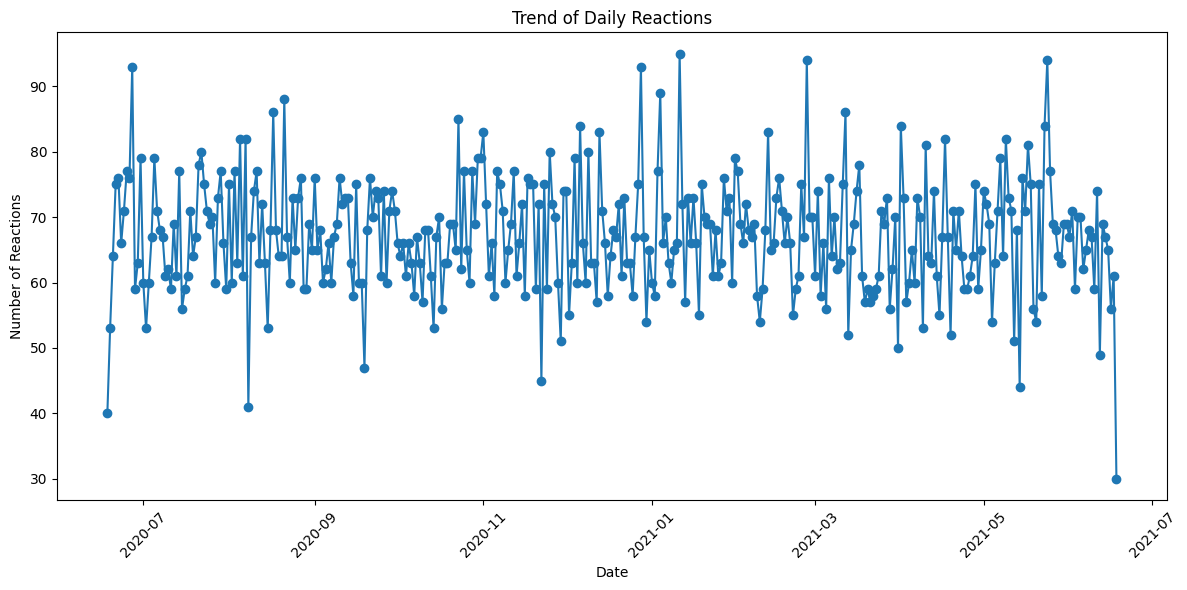

In [8]:
# Grafik 2: Trend Reaksi Berdasarkan Waktu (Per Hari)
# Buat kolom tanggal
df['Date'] = df['Datetime'].dt.date
reaction_trend = df.groupby('Date').size()

plt.figure(figsize=(12, 6))
reaction_trend.plot(marker='o', linestyle='-')
plt.title("Trend of Daily Reactions")
plt.xlabel("Date")
plt.ylabel("Number of Reactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

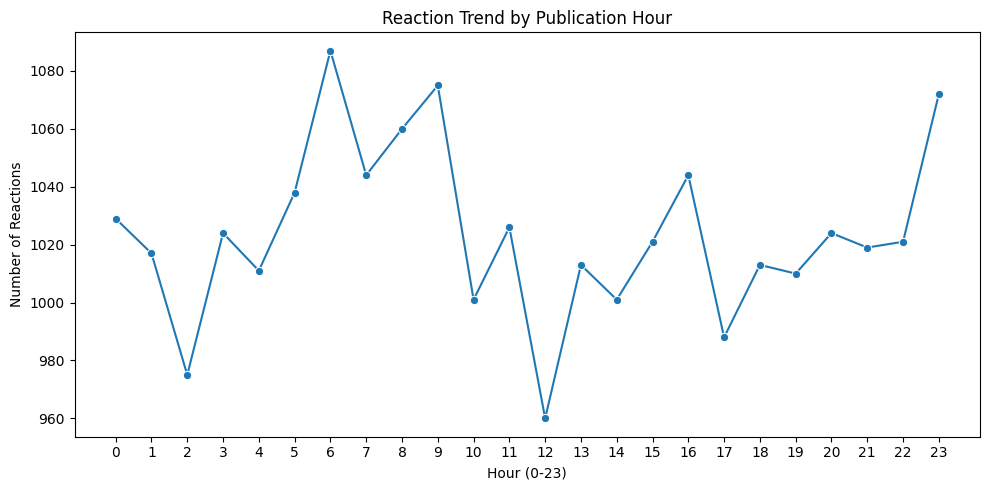

In [9]:
# Grafik 3: Trend Reaksi Berdasarkan Jam (Waktu Publikasi)
# Ekstrak jam dari kolom Datetime
df['Hour'] = df['Datetime'].dt.hour
reaction_trend_hourly = df.groupby('Hour').size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.lineplot(data=reaction_trend_hourly, x='Hour', y='Count', marker='o')
plt.title("Reaction Trend by Publication Hour")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Reactions")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

<ipython-input-10-3cd089463eec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content Type', order=df['Content Type'].value_counts().index, palette='viridis')


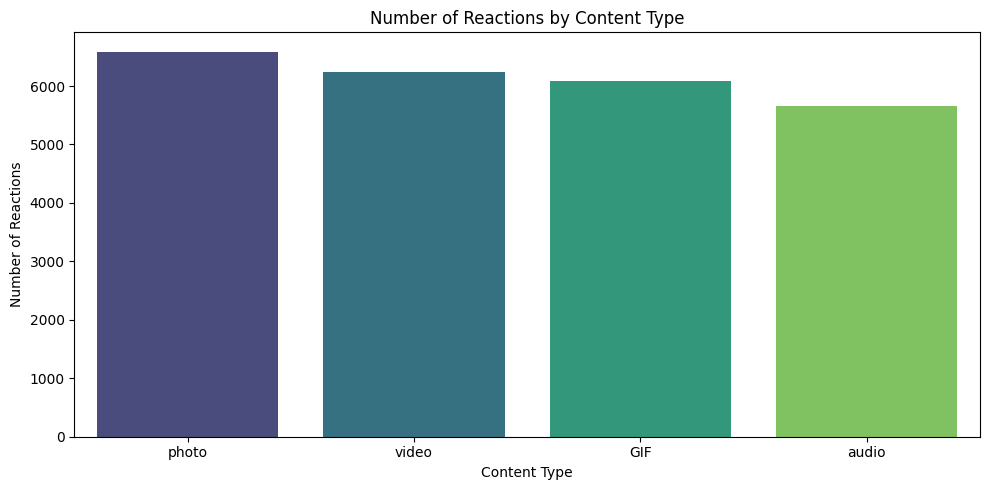

In [10]:
# Grafik 4: Distribusi Tipe Konten dan Jumlah Reaksi
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Content Type', order=df['Content Type'].value_counts().index, palette='viridis')
plt.title("Number of Reactions by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Number of Reactions")
plt.tight_layout()
plt.show()

<ipython-input-11-61e7469f953c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_categories, y='Category', x='Score', palette='magma')


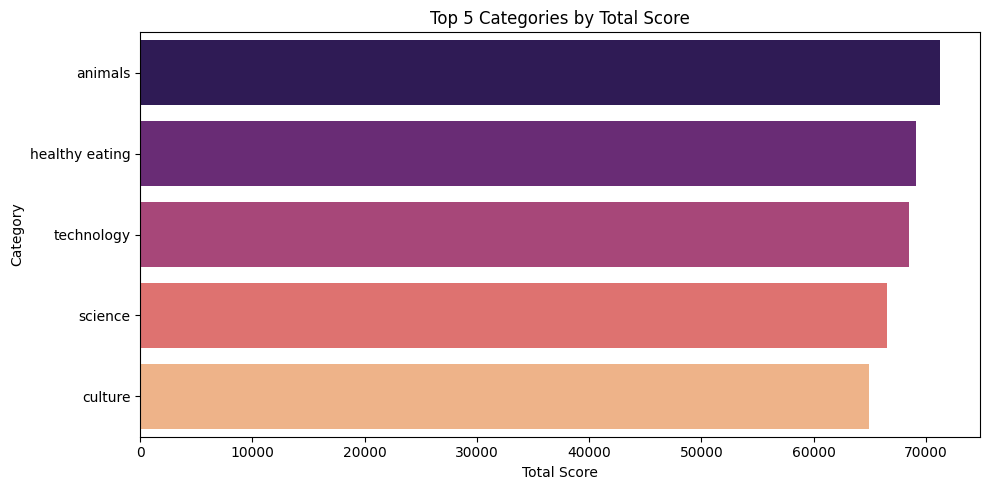

In [11]:
# Grafik 6: Top 5 Categories by Score
df_top_categories = df.groupby('Category')['Score'].sum().sort_values(ascending=False).reset_index()
df_top_categories = df_top_categories.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_top_categories, y='Category', x='Score', palette='magma')
plt.title("Top 5 Categories by Total Score")
plt.xlabel("Total Score")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

<ipython-input-12-ffede76d61ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Score', palette='coolwarm')


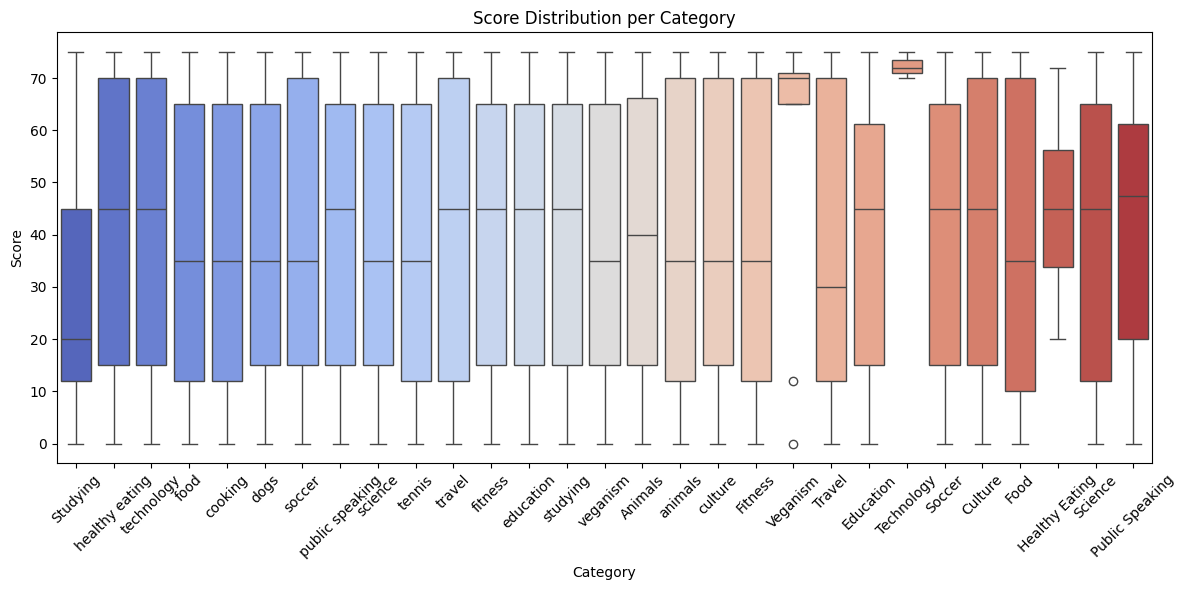

In [12]:
# Grafik 5: Boxplot Distribusi Score per Kategori
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Score', palette='coolwarm')
plt.title("Score Distribution per Category")
plt.xlabel("Category")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()